In [1]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 18
plt.rcParams["font.family"] = "NanumGothicCoding"
mpl.rcParams["axes.unicode_minus"] = False
import seaborn as sns
%matplotlib inline

In [2]:
# 성적 데이터 분석
# pandas의 read_excel() 메소드로 엑셀 파일을 읽어와 데이터프레임으로 저장한다.
# !pip install xlrd # 엑셀 파일을 읽을 때 사용하는 모듈
df = pd.read_excel("./data/score.xlsx")
df

,반,이름,국어,영어,수학,과학
0,1,성춘향,67,87,90,98
1,1,이몽룡,45,45,56,98
2,1,향단이,95,59,96,88
3,1,방자,65,94,89,98
4,1,월매,45,65,78,98
5,1,변학도,78,76,98,89
6,2,홍길동,87,67,65,56
7,2,임꺽정,89,98,78,78
8,2,전우치,100,78,56,65
9,2,일지매,99,89,87,87


In [3]:
# 액셀 파일에서 읽어들인 데이터가 저장된 데이터프레임에 총점과 평균의 파생(계산에 의한) 변수를
# 추가한다.
subjects = ["국어", "영어", "수학", "과학"]
df["총점"] = df[subjects].sum(axis = 1)
df["평균"] = df[subjects].mean(axis = 1)
df

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50


In [11]:
df.dtypes

반       int64
이름     object
국어      int64
영어      int64
수학      int64
과학      int64
총점      int64
평균    float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   반       12 non-null     int64  
 1   이름      12 non-null     object 
 2   국어      12 non-null     int64  
 3   영어      12 non-null     int64  
 4   수학      12 non-null     int64  
 5   과학      12 non-null     int64  
 6   총점      12 non-null     int64  
 7   평균      12 non-null     float64
dtypes: float64(1), int64(6), object(1)
memory usage: 896.0+ bytes


In [4]:
# sort_values() 메소드로 데이터프레임의 특정 열을 기준으로 데이터를 정렬할 수 있다.
# ascending 옵션을 생략하거나 True를 지정하면 오름차순으로 정렬되고 False를 지정하면 내림차순으로
# 정렬된다.
# 정렬에 기준으로 사용할 열이 2개 이상이면 인덱스에 담아서 메소드로 전달하고 전달된 리스트의 0번
# 인덱스로 지정된 값이 같으면 1번 인덱스 값으로 정렬한다.
sorted_df = df.sort_values(["평균"], ascending = False)
sorted_df

,반,이름,국어,영어,수학,과학,총점,평균
9,2,일지매,99,89,87,87,362,90.50
3,1,방자,65,94,89,98,346,86.50
7,2,임꺽정,89,98,78,78,343,85.75
0,1,성춘향,67,87,90,98,342,85.50
5,1,변학도,78,76,98,89,341,85.25
2,1,향단이,95,59,96,88,338,84.50
11,2,콩쥐,65,89,87,78,319,79.75
8,2,전우치,100,78,56,65,299,74.75
4,1,월매,45,65,78,98,286,71.50
6,2,홍길동,87,67,65,56,275,68.75


In [5]:
# 평균의 내림차순으로 정렬된 데이터로 막대 그래프를 그린다.
# x축으로 학생 이름이 출력되지 않고 인덱스가 출력되므로 어떤 학생의 그래프인지 알 수 없기 때문에
# 인덱스를 학생 이름으로 변경한 후 그래프를 작성한다.
sorted_df.index = sorted_df["이름"]
sorted_df

,반,이름,국어,영어,수학,과학,총점,평균
이름,,,,,,,,
일지매,2,일지매,99,89,87,87,362,90.50
방자,1,방자,65,94,89,98,346,86.50
임꺽정,2,임꺽정,89,98,78,78,343,85.75
성춘향,1,성춘향,67,87,90,98,342,85.50
변학도,1,변학도,78,76,98,89,341,85.25
향단이,1,향단이,95,59,96,88,338,84.50
콩쥐,2,콩쥐,65,89,87,78,319,79.75
전우치,2,전우치,100,78,56,65,299,74.75
월매,1,월매,45,65,78,98,286,71.50


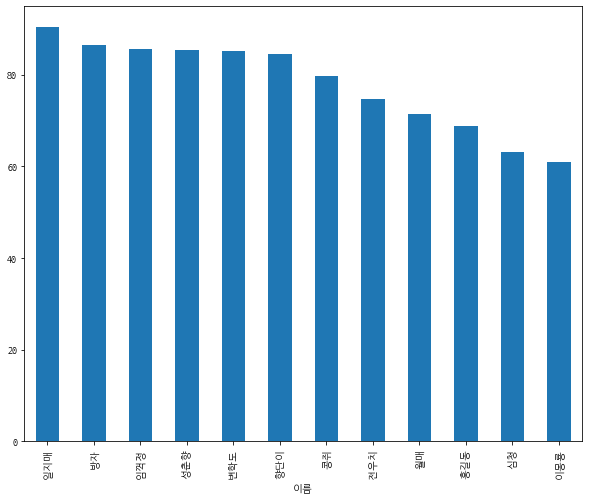

In [10]:
# plot() 메소드로 그래프를 그린다. kind 속성에 bar라고 지정하면 막대 그래프를 그릴수 있고 figsize
# 속성에 리스트나 튜플 형태로 그래프의 크기를 지정할 수 있다.
sorted_df["평균"].plot(kind = "bar", figsize = [10, 8])
# 그래프가 작성되고 난 후 matplotlib 객체의 이름이 출력되므로 show() 메소드를 실행해서 그래프만
# 출력되게 한다.
# plt.show()

1반과 2반의 전체 점수 비교

In [14]:
일반 = df[df["반"] == 1]
일반

,반,이름,국어,영어,수학,과학,총점,평균
0,1,성춘향,67,87,90,98,342,85.50
1,1,이몽룡,45,45,56,98,244,61.00
2,1,향단이,95,59,96,88,338,84.50
3,1,방자,65,94,89,98,346,86.50
4,1,월매,45,65,78,98,286,71.50
5,1,변학도,78,76,98,89,341,85.25


In [15]:
이반 = df[df["반"] == 2]
이반

,반,이름,국어,영어,수학,과학,총점,평균
6,2,홍길동,87,67,65,56,275,68.75
7,2,임꺽정,89,98,78,78,343,85.75
8,2,전우치,100,78,56,65,299,74.75
9,2,일지매,99,89,87,87,362,90.50
10,2,심청,98,45,56,54,253,63.25
11,2,콩쥐,65,89,87,78,319,79.75


In [17]:
일반평균 = 일반["총점"].sum() / (6 * 4)
print(일반평균)
이반평균 = 이반["총점"].sum() / (6 * 4)
print(이반평균)

79.04166666666667
77.125


In [19]:
# 1반 평균이 높다.
# 1반 선생님이 매우 좋아합니다. 그걸 보고있던 2반 선생님은 "별 차이도 안나는구먼 뭘~~~~~" 이라고 
# 합니다.
# 정말로 두 반의 평균은 별 추이가 없는 것일까? 서로 독립적인 두 집단에서 얻어진 수치형 자료로 부터
# 두 집단의 차이가 유사한지를 파악하는데는 독립표본 t-검정(two independent sample t-test)이
# 유용하다. => scipy 라이브러리의 ttest_ind() 메소드로 바로 계산이 가능하다.

# !pip install scipy # 통계 작업에 사용하는 과학용 라이브러리
import scipy.stats as stats
stats.ttest_ind(일반["평균"], 이반["평균"])
# pvalue > 0.005 이므로 두 집단 차이가 없다는 영가설을 채택한다. 즉 1반과 2반은 사실 유의한 점수
# 차이가 없다. => 오차 수준에 의한 차이라고 봐야한다.

Ttest_indResult(statistic=0.319960228209846, pvalue=0.755583336185639)

In [25]:
# 과목별로 차이가 있는가 과목별로 확인해 보자
for subject in subjects:
    print(subject, stats.ttest_ind(일반[subject], 이반[subject]), sep = " => ")

국어 => Ttest_indResult(statistic=-2.490140665442242, pvalue=0.031982494983816424)
영어 => Ttest_indResult(statistic=-0.6156907152631581, pvalue=0.5518533781528807)
수학 => Ttest_indResult(statistic=1.4961318778859336, pvalue=0.1654958420079056)
과학 => Ttest_indResult(statistic=4.328442555331755, pvalue=0.0014931977711732465)


In [29]:
# 과학 과목 점수는 pvalue < 0.005 이므로 차이가 많이 난다는 것을 알 수 있다.
print("1반 과학 점수 평균", 일반["과학"].mean())
print("2반 과학 점수 평균", 이반["과학"].mean())

1반 과학 점수 평균 94.83333333333333
2반 과학 점수 평균 69.66666666666667


과목별 비교

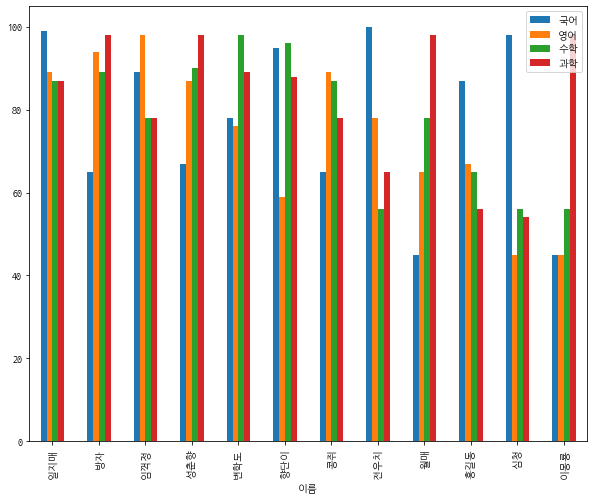

In [32]:
# 과목별 점수의 특징을 파악하기 위해 막대 그래프를 과목별로 그려보자
# 1등인 일지매는 전체적으로 점수가 고르게 높은데 2등 부터는 점수 점점 들쑥날쑥 한다.
sorted_df[subjects].plot(kind = "bar", figsize = [10, 8])
plt.show()

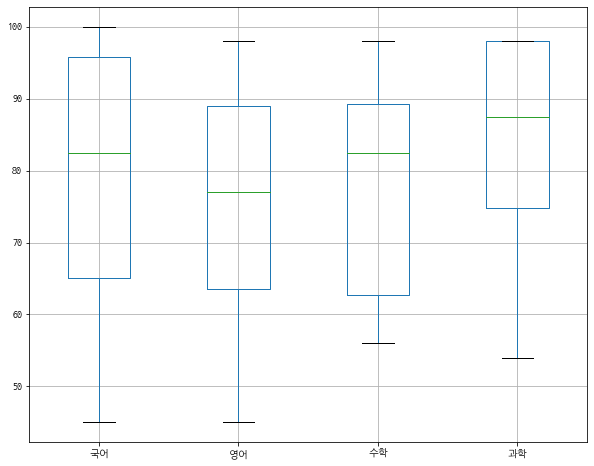

In [34]:
# boxplot 그래프로 과목별 점수 분포 그래프를 그려보자
df[subjects].boxplot(figsize = [10, 8])
plt.show()

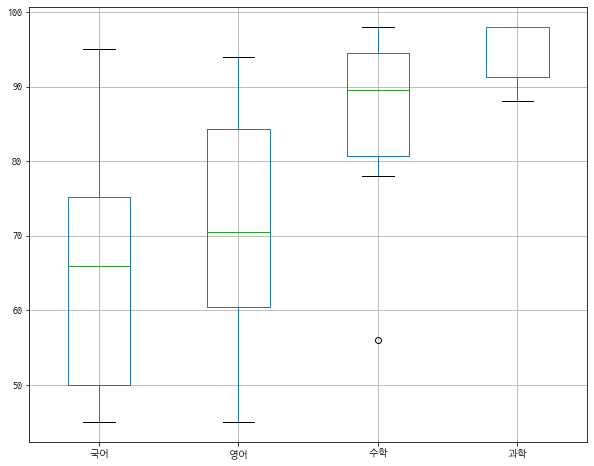

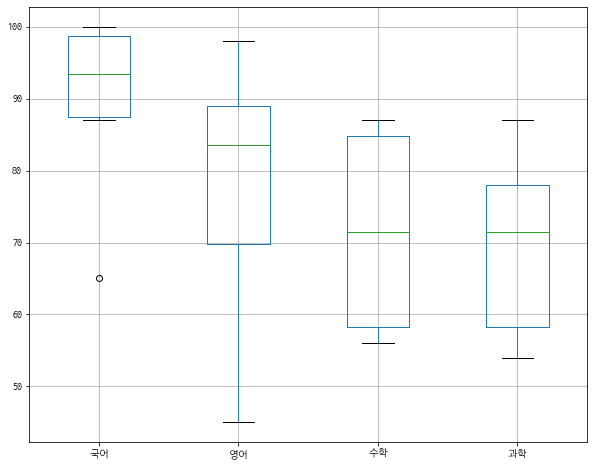

In [36]:
# 1반과 2반을 각각 boxplot을 그려보자
일반[subjects].boxplot(figsize = [10, 8])
plt.show()
이반[subjects].boxplot(figsize = [10, 8])
plt.show()

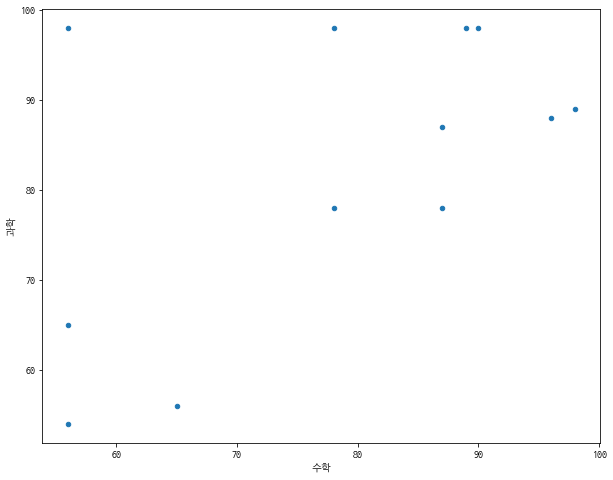

In [37]:
# 과목별 상관도
# 보통 수학 점수가 높으면 과학 점수가 높을 것이라고 기대하고 국어 점수가 높으면 영어 점수가 높을
# 것이라고 기대할 수 있다.
# 수리 능력, 언어 능력이 별개의 특징으로 생각될 수 있기 때문이다. 여기 학생들을 살펴보면 수학 
# 점수가 눞으면 과학 점수도 높아 보이는 어느정도 상관 관계가 있어 보인다.
df.plot(kind = "scatter", x = "수학", y = "과학", figsize = [10, 8])
plt.show()

In [40]:
# 얼마나 상관 관계가 있나는 상관 계수를 구해보면 알 수 있다.
# scipy 라이브러리의 stats 모듈의 피어슨 상관 계수를 구하는 pearsonr() 메소드가 준비되어 있다.
# 앞 숫자가 상관 계수이고 뒷 숫자가 pvalue를 의미한다. 상관 계수가 0.5보다 높으므로 관계가 있기는
# 하지만 pvalue > 0.005 이므로 유의한 상관 관계가 있지는 않다. => 데이터가 좀 더 많아지면 pvalue가
# 의미있어지는 경우가 많은데 이 데이터는 모수가 되는 데이터의 개수가 작아서 의미를 찾기는 어렵다.
stats.pearsonr(df["수학"], df["과학"])

(0.563289059706775, 0.05650580486155533)

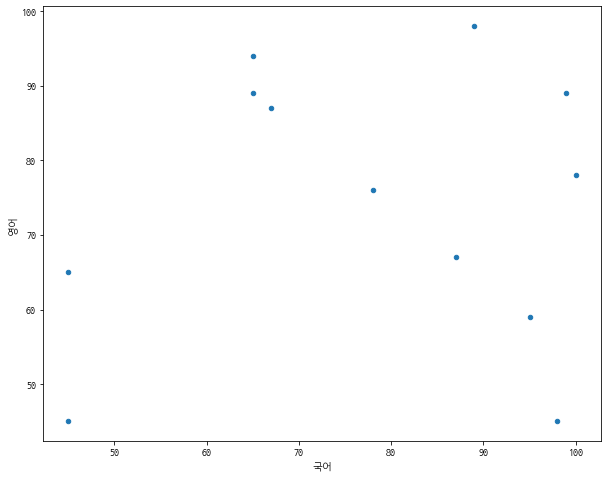

In [39]:
df.plot(kind = "scatter", x = "국어", y = "영어", figsize = [10, 8])
plt.show()

In [42]:
stats.pearsonr(df["국어"], df["영어"])

(0.10566562777973995, 0.7437959551857832)

학생별 성적 패턴 분석

In [43]:
# 학생별로 어떤 학생은 수학을 잘하면서 과학을 잘하지만 영어는 약할 수 있고, 또 어떤 학생은 다른 
# 패턴으로 잘하는 과목에 대한 특징이 있을 수 있다. 학생들끼리 이러한 성적 패턴이 얼마나 비슷한지
# 비교해 보자
# 이를 확인할 수 있는 다양한 방법이 있는데 대표적인 방법으로 주 성분 분석(Principle Component
# Analysis)이 있다. 학생별로 4과목이라는 특성 2개로 축약한 후 2차원 평면에 표시하면 그 종합적인
# 처리를 한 눈에 알 수 있다.
df[subjects]

,국어,영어,수학,과학
0,67,87,90,98
1,45,45,56,98
2,95,59,96,88
3,65,94,89,98
4,45,65,78,98
5,78,76,98,89
6,87,67,65,56
7,89,98,78,78
8,100,78,56,65
9,99,89,87,87


In [44]:
# PCA는 scikit-learn이라는 라이브러리를 설치하면 사용할 수 있다.
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler # 정규화
# StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환한다.
X_std = StandardScaler().fit_transform(df[subjects])
X_std

array([[-0.55809652,  0.72621778,  0.78954203,  1.01066629],
       [-1.70024754, -1.68176748, -1.44749373,  1.01066629],
       [ 0.89555023, -0.87910573,  1.18431305,  0.36897341],
       [-0.66192843,  1.12754865,  0.72374686,  1.01066629],
       [-1.70024754, -0.53510783,  0.        ,  1.01066629],
       [ 0.01297899,  0.09555497,  1.31590339,  0.43314269],
       [ 0.48022259, -0.42044187, -0.8553372 , -1.68444381],
       [ 0.5840545 ,  1.35688058,  0.        , -0.27271947],
       [ 1.15513001,  0.21022093, -1.44749373, -1.10692022],
       [ 1.10321405,  0.84088374,  0.59215653,  0.30480412],
       [ 1.0512981 , -1.68176748, -1.44749373, -1.81278239],
       [-0.66192843,  0.84088374,  0.59215653, -0.27271947]])

In [45]:
# 위의 행렬 데이터가 PCA의 입력으로 사용되고 PCA 분석 함수는 scikit-learn 라이브러리에서 제공된다.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Y = pca.fit_transform(X_std)
Y

array([[-1.56591653, -0.09168753],
       [ 0.11774518,  2.93515218],
       [-0.20727166, -0.38845514],
       [-1.71984653, -0.24234692],
       [-1.11185524,  1.70512415],
       [-1.03327136, -0.43547978],
       [ 1.88205338, -0.20323602],
       [-0.10118555, -1.27408337],
       [ 1.88020684, -0.64411706],
       [-0.39554448, -1.36047251],
       [ 2.98704605,  0.37256038],
       [-0.7321601 , -0.37295837]])

In [48]:
# Y 변수에 저장된 4과목(4차원)을 2차원으로 축약한 데이터 값이 저장된다. 보통 제1주성분, 제2주성분
# 이라고도 한다. 이 데이터를 원래 데이터(df)에 추가한다.
pca_df = pd.DataFrame(Y)
pca_df.index = df.index
pca_df.columns = ["PC1", "PC2"]
pca_df 

,PC1,PC2
0,-1.565917,-0.091688
1,0.117745,2.935152
2,-0.207272,-0.388455
3,-1.719847,-0.242347
4,-1.111855,1.705124
5,-1.033271,-0.435480
6,1.882053,-0.203236
7,-0.101186,-1.274083
8,1.880207,-0.644117
9,-0.395544,-1.360473


In [49]:
df2 = pd.concat([df, pca_df], axis = 1)
df2

,반,이름,국어,영어,수학,과학,총점,평균,PC1,PC2
0,1,성춘향,67,87,90,98,342,85.50,-1.565917,-0.091688
1,1,이몽룡,45,45,56,98,244,61.00,0.117745,2.935152
2,1,향단이,95,59,96,88,338,84.50,-0.207272,-0.388455
3,1,방자,65,94,89,98,346,86.50,-1.719847,-0.242347
4,1,월매,45,65,78,98,286,71.50,-1.111855,1.705124
5,1,변학도,78,76,98,89,341,85.25,-1.033271,-0.435480
6,2,홍길동,87,67,65,56,275,68.75,1.882053,-0.203236
7,2,임꺽정,89,98,78,78,343,85.75,-0.101186,-1.274083
8,2,전우치,100,78,56,65,299,74.75,1.880207,-0.644117
9,2,일지매,99,89,87,87,362,90.50,-0.395544,-1.360473


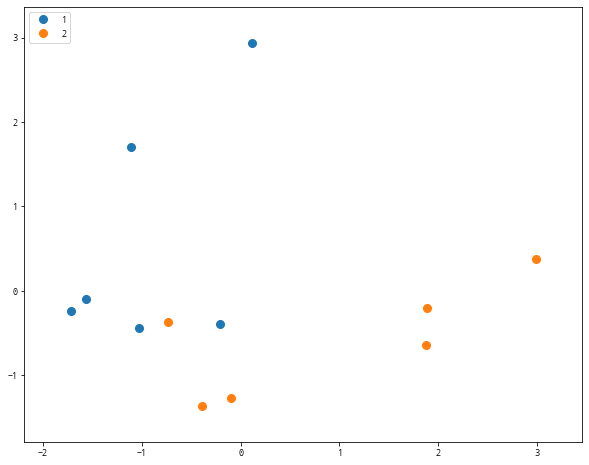

In [67]:
fig, ax = plt.subplots(figsize = [10, 8])
ax.margins(0.1)
for name, group in df2.groupby("반"):
    ax.plot(group["PC1"], group["PC2"], marker = "o", linestyle = "", ms = 8, label = name)
ax.legend(numpoints = 1, loc = "upper left")
plt.show()

In [ ]:
# 머신러닝은 모델을 구현하는 것도 중요하지만, 학습할 데이터를 선별하고, 만들어진 모델을 검증하기 
# 위해서는 데이터를 이해하는 것이 필수입니다.
# 이를 위해서 데이터 시각화 해서 보는 것이 매우 중요하다. 기본적으로 그래프를 그리기 위해서는 
# plot(x, y)를 사용하는데 이때 x는 x축이 되고 y는 축이 됩니다.

# 선의 색깔 바꾸기
# r : red
# b : blue
# g : green
# c : cyan
# m : magenta
# y : yellow
# k : black

# 선의 종류 변경하기 => 디폴트가 직선이고, 점으로 표현하는 마커나 점선등을 선택할 수 있다.
# 'o' : 동그라미 마커
# '-' : 직선
# '--' : dash-dot line
# ':' : dotted line
# '.' : point marker
# ',' : pixel marker
# 'v' : triangle_down 
# '^' : triangle_up
# '<' : triangle_left
# '>' : triangle_right
# '1' : tri_down
# '2' : tri_up
# '3' : tri_left
# '4' : tri_right
# 's' : square
# 'p' : pantageon
# '*' : star
# 'd' : diamond

# 라벨과 타이틀
# plt.title("타이틀 명")
# plt.xlabel 또는 plt.ylabel

# 그래프 사이즈
# 그래프를 크게 그리고 싶을 때 그래프 자체의 크기를 변경할 수 있는데, plt.figure를 이용하여 
# figsize = (가로, 세로)를 인자로 주면 그래프가 그려질 전체 그림의 크기를 조절할 수 있다.

[1 2 3 4 5 6 7 8 9]
[ 5 10 15 20 25 30 35 40 45]


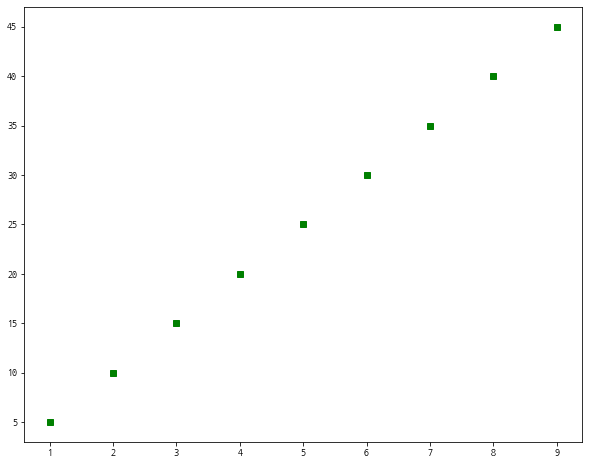

In [88]:
x = np.arange(1, 10)
print(x)
y = x * 5
print(y)

plt.figure(figsize = (10, 8))
plt.plot(x, y, "sg")
plt.show()

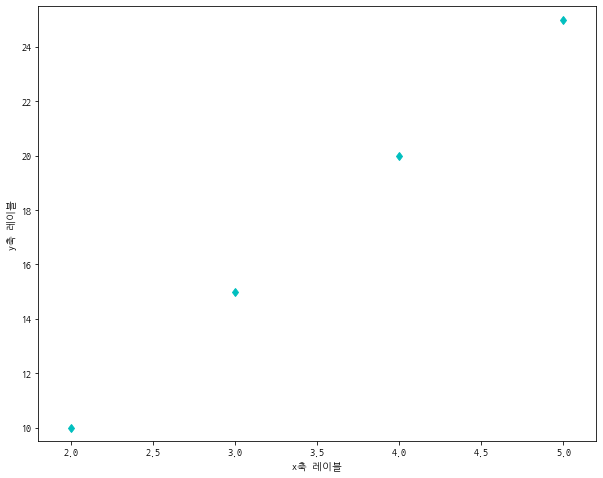

In [95]:
# 구간 확대
# 그래프는 입력되는 x, y의 최소, 최대 구간으로 자동으로 그려지는데, 이 구간을 키우거나 줄이기 위해
# x, y의 구간을 정의할 수 있다.
plt.figure(figsize = (10, 8))
plt.plot(x, y, "dc")
plt.xlabel("x축 레이블")
plt.ylabel("y축 레이블")
plt.xlim(1.8, 5.2)
plt.ylim(9.5, 25.5)
plt.show()

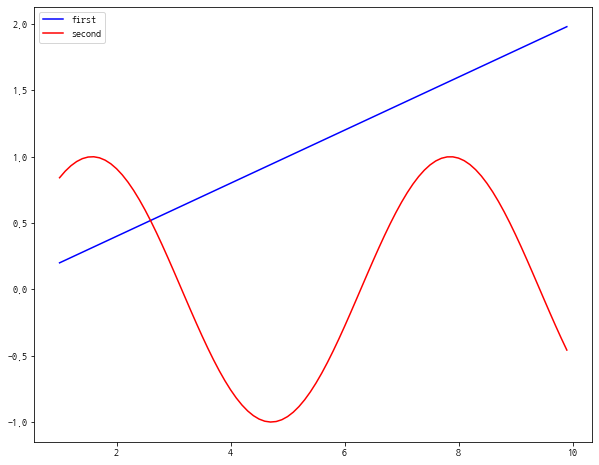

In [110]:
# 그래프를 그릴 때 여러 개의 그래프를 같이 그릴 수 있다.
# 이 경우 각 그래프가 구분이 안되기 때문에 그래프마다 라벨을 달고 라벨 이름을 출력하는데 이를
# 범례(legend)라고 한다.
x = np.arange(1, 10, 0.1)
# print(x)
y = x * 0.2
# print(y)
y2 = np.sin(x)
# print(y2)

plt.figure(figsize = (10, 8))
plt.plot(x, y, "b", label = "first")
plt.plot(x, y2, "r", label = "second")
plt.legend(loc = "upper center")
plt.show()

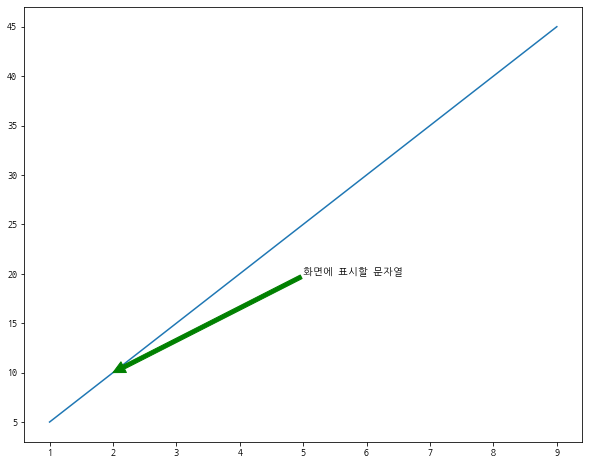

In [115]:
# 어노테이트
# 그래프에서 화살표를 그린 후 그 화살표에 문자를 출력하는 기능
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = (10, 8))
plt.plot(x, y)
plt.annotate("화면에 표시할 문자열", xy = (2, 10), xytext = (5, 20), 
             arrowprops = {"color": "green"})
plt.show()

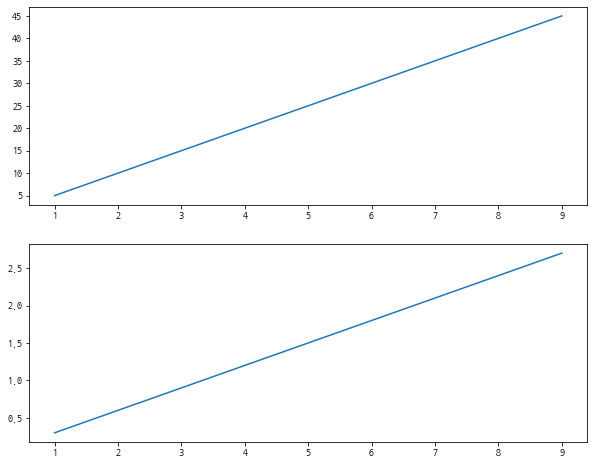

In [117]:
# subplot => 여러개의 그래프를 그리고 싶을 때 사용한다.
# subplot은 그래프가 그려질 위치를 격자형으로 지정하는데 plt.subplot(nrow, ncol, pos)와 같이
# 사용한다.
# nrow, ncol는 그래프를 그릴 그림 패널의 크기를 지정하고 3, 2는 3줄 2칸으로 된 그래프를 그리고 
# pos는 몇 번째 패널에 그래프를 그릴지 지정한다.
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = (10, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.show()

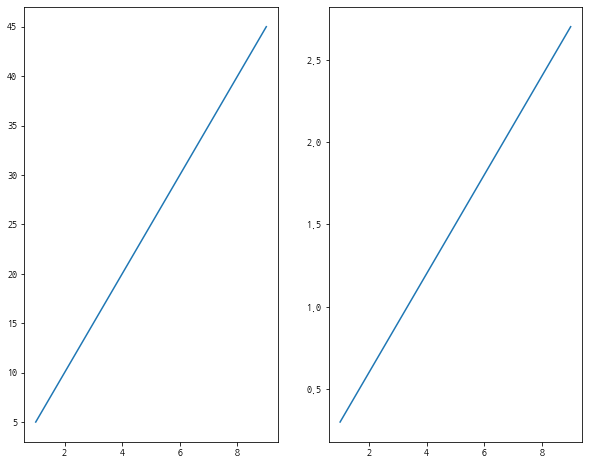

In [119]:
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = (10, 8))
plt.subplot(1, 2, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(1, 2, 2)
plt.plot(x, y2)
plt.show()

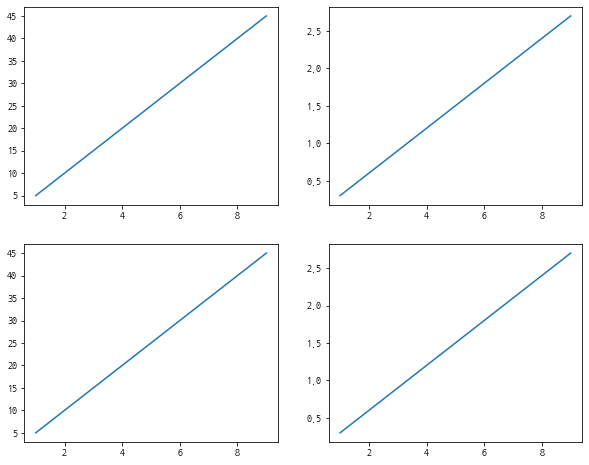

In [121]:
x = np.arange(1, 10)
y = x * 5
plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
plt.plot(x, y)
y2 = x * 0.3
plt.subplot(2, 2, 2)
plt.plot(x, y2)
plt.subplot(2, 2, 3)
plt.plot(x, y)
plt.subplot(2, 2, 4)
plt.plot(x, y2)
plt.show()